In [1]:
# Modules
import numpy as np
import pandas as pd
import requests
from census import Census
from us import states
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
# Read final data csv into df
final_df = pd.read_csv('../Final/raw_data/final merged data.csv')

final_df

,Unnamed: 0,Median Age,Median Household Income,Population,Locale,Violent Crime Total,Property Crime Total,Violent Rate,Property Rate,Walk Score,Population Density
0,0,38.5,101883.0,67958.0,"Albemarle County, Virginia",97,1604,0.001427,0.023603,5.32,144.962534
1,1,35.8,146422.0,87319.0,"Alexandria city, Virginia",280,2983,0.003207,0.034162,52.59,10005.381352
2,2,33.8,220173.0,105120.0,"Arlington County, Virginia",314,3521,0.002987,0.033495,62.63,8730.032197
3,3,36.6,228168.0,70176.0,"Chesapeake city, Virginia",999,6429,0.014236,0.091613,3.63,684.803983
4,4,38.0,324337.0,72514.0,"Chesterfield County, Virginia",422,6373,0.005820,0.087886,7.99,785.356713
5,5,37.4,1117072.0,112102.0,"Fairfax County, Virginia",969,14603,0.008644,0.130265,54.82,2910.082967
6,6,35.5,136904.0,49879.0,"Hampton city, Virginia",349,4441,0.006997,0.089035,30.15,2660.875061
7,7,37.8,314878.0,61438.0,"Henrico County, Virginia",502,7818,0.008171,0.127250,16.43,1377.525769
8,8,35.1,338916.0,123966.0,"Loudoun County, Virginia",221,2607,0.001783,0.021030,3.38,703.918424
9,9,32.7,181362.0,51000.0,"Newport News city, Virginia",782,5552,0.015333,0.108863,27.54,2657.263510


# Crime vs. Walk Score

## Scatter Plot

In [16]:
# Add data to plot for violent crime totals.
violent = plt.scatter(final_df['Walk Score'],
                      final_df['Violent Rate'],
                      label='Violent', color='hotpink', alpha=.8, edgecolor='black')                    

# Add data to plot for property crime totals.
property = plt.scatter(final_df['Walk Score'],
                       final_df['Property Rate'],
                       label='Property', color='c', alpha=.8, edgecolor='black')

# Add a legend in the best location.
plt.legend(handles=[violent, property], loc='best', title='Crime Type', frameon=True)

# Add labels to the x- and y-axes; give the chart a title.
plt.xlabel('Walk Score')
plt.ylabel('Per Capita Crime Rate')
plt.title('Crime Rate vs. Walk Score')

# Set x and y limits.
plt.xlim(0, 70)
plt.ylim(-.01, .3)

# Set the grid background style.
sns.set_style('darkgrid')

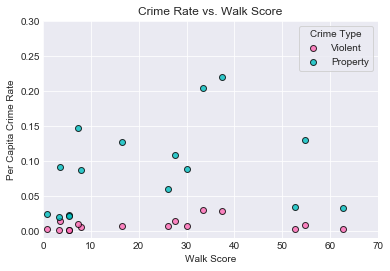

In [17]:
# Save and display plot.
output_path = os.path.join('output', 'crime-rate-vs-walk-score.png')
plt.savefig(output_path, dpi=200)
plt.show()

**Observed Trend**: No relationship between walk score and rate of violent crime, nor rate of property crime. Highest crime rates in both categories occurred for the two locales with walk scores in the mid- to upper-thirties.

## Correlations

In [67]:
# Violent Crime Rate vs. Walk Score
violent_corr = np.corrcoef(final_df['Walk Score'], final_df['Violent Rate'])

# Property Crime Rate vs. Walk Score
property_corr = np.corrcoef(final_df['Walk Score'], final_df['Property Rate'])

# Print results
print('Violent crime rates and property crime rates do not correlate with\
walk scores (r = '+str(violent_corr[0,1])+' and r = '+str(property_corr[0,1])+', \
respectively')

Violent crime rates and property crime rates do not correlate withwalk scores (r = 0.205502014805 and r = 0.226766481968, respectively


**Conclusion:** Violent crime rates and property crime rates do not correlate with walk scores.